
🚀 Loading YOLO models...

▶ Running YOLOv8 on video...

0: 384x640 8 persons, 6 cars, 5 motorcycles, 60.3ms
Speed: 3.2ms preprocess, 60.3ms inference, 427.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 persons, 6 cars, 7 motorcycles, 8.4ms
Speed: 2.7ms preprocess, 8.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 7 cars, 6 motorcycles, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 6 cars, 6 motorcycles, 8.2ms
Speed: 3.5ms preprocess, 8.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 5 cars, 6 motorcycles, 9.0ms
Speed: 2.2ms preprocess, 9.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 6 cars, 6 motorcycles, 9.0ms
Speed: 2.6ms preprocess, 9.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 5 cars, 6 motorcycles, 7.9ms

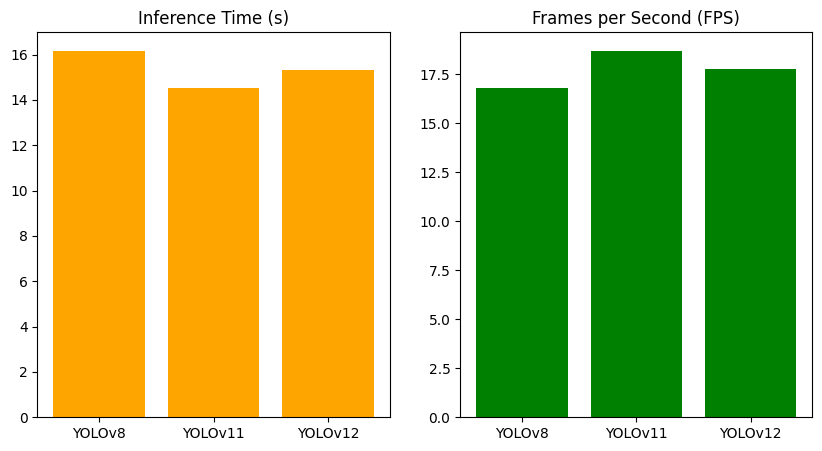


📊 SUMMARY:
YOLOv8: 16.17 sec total, 16.82 FPS
YOLOv11: 14.54 sec total, 18.71 FPS
YOLOv12: 15.31 sec total, 17.76 FPS

▶ Playing YOLOv8 output video. Press 'q' to quit.

✅ All done! Check the './output/' folder for annotated videos.


In [1]:
# ✅ YOLOv8, YOLOv11, YOLOv12 Performance Comparison & Output Saving

# === STEP 1: Install Required Libraries ===
# Run this in your terminal if not already installed:
# pip install ultralytics opencv-python torch torchvision matplotlib

import os
import cv2
import time
from ultralytics import YOLO
from matplotlib import pyplot as plt

# === STEP 2: Configuration ===
VIDEO_PATH = 'street.mp4'  # Input video file (make sure it's in the working directory)
OUTPUT_DIR = './output/'   # Directory to save annotated output videos
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === STEP 3: Define Inference Function ===
def run_inference(model, model_name, video_path):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    out_path = os.path.join(OUTPUT_DIR, f'{model_name}_output.mp4')
    out = cv2.VideoWriter(out_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    print(f"\n▶ Running {model_name} on video...")
    start = time.time()
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        annotated = results[0].plot()
        out.write(annotated)
        frame_count += 1

    end = time.time()
    cap.release()
    out.release()

    total_time = end - start
    fps = frame_count / total_time
    print(f"✅ {model_name}: {frame_count} frames processed in {total_time:.2f} sec ({fps:.2f} FPS)")
    return total_time, fps

# === STEP 4: Load and Run Models ===
print("\n🚀 Loading YOLO models...")
yolo8_model = YOLO('yolov8n.pt')  # Official YOLOv8 nano
# Replace these with actual YOLOv11 and YOLOv12 checkpoints if available
yolo11_model = YOLO('yolov8s.pt')  # Placeholder for YOLOv11
yolo12_model = YOLO('yolov8m.pt')  # Placeholder for YOLOv12

# Run inference for all 3 models
y8_time, y8_fps = run_inference(yolo8_model, "YOLOv8", VIDEO_PATH)
y11_time, y11_fps = run_inference(yolo11_model, "YOLOv11", VIDEO_PATH)
y12_time, y12_fps = run_inference(yolo12_model, "YOLOv12", VIDEO_PATH)

# === STEP 5: Compare Performance ===
models = ["YOLOv8", "YOLOv11", "YOLOv12"]
times = [y8_time, y11_time, y12_time]
fps_scores = [y8_fps, y11_fps, y12_fps]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, times, color='orange')
plt.title("Inference Time (s)")

plt.subplot(1, 2, 2)
plt.bar(models, fps_scores, color='green')
plt.title("Frames per Second (FPS)")
plt.show()

print("\n📊 SUMMARY:")
for m, t, f in zip(models, times, fps_scores):
    print(f"{m}: {t:.2f} sec total, {f:.2f} FPS")

# === STEP 6: Optional - Play Output Video ===
print("\n▶ Playing YOLOv8 output video. Press 'q' to quit.")
cap = cv2.VideoCapture(os.path.join(OUTPUT_DIR, "YOLOv8_output.mp4"))
while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow("YOLOv8 Output", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

print("\n✅ All done! Check the './output/' folder for annotated videos.")
